# Wrangling for Primary Analysis Primary Outcome

Multivariate polytomous logistic model:

(14day recurrent stroke, PE, death, none) ~ hotencoded aspirin/heparin group + covariates

In [690]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ist_corrected = pd.read_csv('IST_corrected - Copy.csv', low_memory=False) #load initial

df_filtered = ist_corrected[['DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK',
                             'DRSISC', 'DRSH', 'DRSUNK', 'DPE', 'DDEAD',
                             'RDELAY', 'RCONSC', 'SEX', 'AGE', 'RSLEEP', 'RATRIAL', 'RHEP24', 'RASP3', 'RSBP', 'STYPE', 'RXASP', 'RXHEP', 
                             'DASP14', 'DLH14', 'DMH14', 'DSCH', 'DIVH', 'DAP', 'DOAC', 'DGORM', 'DSTER', 'DCAA', 'DHAEMD', 'DCAREND', 'DTHROMB']]

In [3]:
#remove first 984 patients (pilot study)
df_filtered = df_filtered.iloc[984: , :].reset_index()
df_filtered = df_filtered.drop(columns=['index'])

#remove the rows if the final diagnosis of the initial even was a haemorrhagic stroke, an indeterminate stroke, or not a stroke
df_filtered = df_filtered[df_filtered.DDIAGISC != "N"]
df_filtered = df_filtered[df_filtered.DDIAGHA != "Y"]
df_filtered = df_filtered[df_filtered.DDIAGUN != "Y"]
df_filtered = df_filtered[df_filtered.DNOSTRK != "Y"]

#we can now drop DDIAGISC DDIAGHA DDIAGUN DNOSTRK
df_filtered = df_filtered.drop(columns=['DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK'])

#only include patients who got a high dose of heparin or no dose of heparin
df_filtered = df_filtered[df_filtered.RXHEP != "L"]

df_filtered = df_filtered[df_filtered.DRSISC != "U"] #remove patients with unknown DRSISC at 14 days

In [4]:
print(df_filtered.isnull().sum())

DRSISC     14
DRSH       10
DRSUNK     14
DPE        10
DDEAD      15
RDELAY      0
RCONSC      0
SEX         0
AGE         0
RSLEEP      0
RATRIAL     0
RHEP24      0
RASP3       0
RSBP        0
STYPE       0
RXASP       0
RXHEP       0
DASP14     15
DLH14      15
DMH14      17
DSCH       12
DIVH       12
DAP        12
DOAC       12
DGORM      17
DSTER      17
DCAA       17
DHAEMD     17
DCAREND    17
DTHROMB    12
dtype: int64


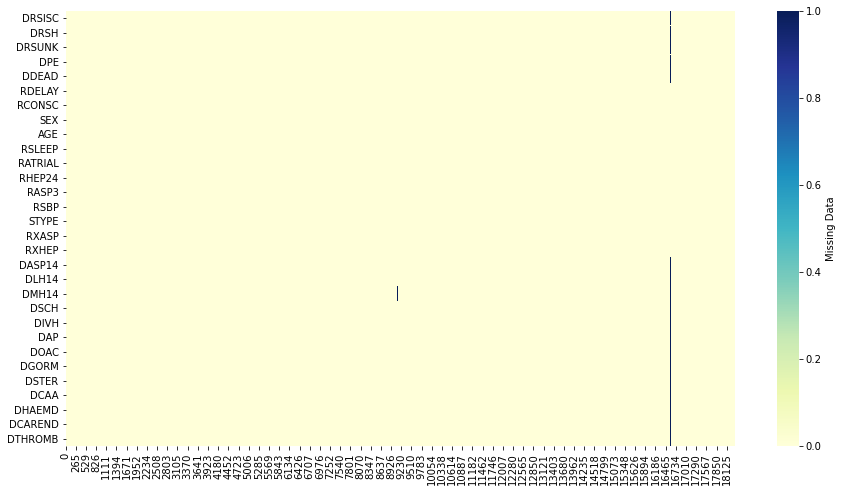

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(df_filtered.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [6]:
df_filtered.dropna(axis=0, how="any", inplace=True) #remove rows with missing data coded as NaN or Null

In [7]:
#replace N with 0, and Y with 1 for DRSISC, DRSH, DRSUNK
df_filtered['DRSISC'] = df_filtered['DRSISC'].replace({'N': 0, 'Y': 1})
df_filtered['DRSH'] = df_filtered['DRSH'].replace({'N': 0, 'Y': 1})
df_filtered['DRSUNK'] = df_filtered['DRSUNK'].replace({'N': 0, 'Y': 1})
df_filtered['DPE'] = df_filtered['DPE'].replace({'N': 0, 'Y': 1})
df_filtered['DDEAD'] = df_filtered['DDEAD'].replace({'N': 0, 'Y': 1})

df_filtered['outcome']=df_filtered['DRSISC'].astype(str) + df_filtered['DRSH'].astype(str) + df_filtered['DRSUNK'].astype(str) + df_filtered['DPE'].astype(str) + df_filtered['DDEAD'].astype(str)

df_filtered['outcome'] = df_filtered['outcome'].replace({'00000': 'N',
                                                         '00001': 'UE',
                                                         '00010': 'IE',
                                                         '00011': 'IE',
                                                         '00100': 'UE',
                                                         '00101': 'UE',
                                                         '00111': 'IE',
                                                         '01000': 'HE',
                                                         '01001': 'HE',
                                                         '01011': 'UE',
                                                         '10000': 'IE',
                                                         '10001': 'IE',
                                                         '10010': 'IE',
                                                         '10100': 'IE',
                                                         '10101': 'IE',
                                                         '11000': 'UE',
                                                         '11001': 'UE'})

#we can now drop DRSISC, DRSH, DRSUNK, DPE, DDEAD
df_filtered = df_filtered.drop(columns=['DRSISC', 'DRSH', 'DRSUNK', 'DPE', 'DDEAD'])

In [8]:
#replace N with 0, and Y with 1 for RXASP
#replace N with 0, and M with 1 for RXHEP
df_filtered['RXASP'] = df_filtered['RXASP'].replace({'N': 0, 'Y': 1})
df_filtered['RXHEP'] = df_filtered['RXHEP'].replace({'N': 0, 'M': 1})

df_filtered['group']=df_filtered['RXASP'].astype(str) + df_filtered['RXHEP'].astype(str)

df_filtered['group'] = df_filtered['group'].replace({'00': 'N',
                                                     '01': 'H',
                                                     '10': 'A', 
                                                     '11': 'AH'})


#we can now drop RXASP and RXHEP
df_filtered = df_filtered.drop(columns=['RXASP', 'RXHEP'])

df_filtered.reset_index(inplace=True)
df_filtered = df_filtered.drop(columns=['index'])

In [9]:
#replace N with 0, and Y with 1 for RHEP24
#replace N with 0, and M with 1 for RASP3
df_filtered['RHEP24'] = df_filtered['RHEP24'].replace({'N': 0, 'Y': 1})
df_filtered['RASP3'] = df_filtered['RASP3'].replace({'N': 0, 'Y': 1})

df_filtered['medHx']=df_filtered['RHEP24'].astype(str) + df_filtered['RASP3'].astype(str)

df_filtered['medHx'] = df_filtered['medHx'].replace({'00': 'N',
                                                     '01': 'A',
                                                     '10': 'H',
                                                     '11': 'AH'})


#we can now drop RHEP24 and RASP3
df_filtered = df_filtered.drop(columns=['RHEP24', 'RASP3'])

df_filtered.reset_index(inplace=True)
df_filtered = df_filtered.drop(columns=['index'])

In [10]:
#only keep patients between the age of 40 and 90 yrs
df_filtered = df_filtered[df_filtered.AGE >= 40]
df_filtered = df_filtered[df_filtered.AGE <= 90]
df_filtered.reset_index(inplace=True)
df_filtered = df_filtered.drop(columns=['index'])

In [11]:
#remove the unknown status patients for alternative medication within the hospital
df_filtered = df_filtered[df_filtered.DASP14 != "U"]
df_filtered = df_filtered[df_filtered.DLH14 != "U"]
df_filtered = df_filtered[df_filtered.DMH14 != "U"]
df_filtered = df_filtered[df_filtered.DSCH != "U"]
df_filtered = df_filtered[df_filtered.DIVH != "U"]
df_filtered = df_filtered[df_filtered.DAP != "U"]
df_filtered = df_filtered[df_filtered.DOAC != "U"]
df_filtered = df_filtered[df_filtered.DGORM != "U"]
df_filtered = df_filtered[df_filtered.DSTER != "U"]
df_filtered = df_filtered[df_filtered.DCAA != "U"]
df_filtered = df_filtered[df_filtered.DHAEMD != "U"]
df_filtered = df_filtered[df_filtered.DCAREND != "U"]
df_filtered = df_filtered[df_filtered.DTHROMB != "U"]
df_filtered.reset_index(inplace=True)
df_filtered = df_filtered.drop(columns=['index'])

In [12]:
binary_columns = ['RSLEEP', 'RATRIAL', 'DASP14', 'DLH14',
                  'DMH14', 'DSCH', 'DIVH', 'DAP', 'DOAC',
                  'DGORM', 'DSTER', 'DCAA', 'DHAEMD', 'DCAREND', 'DTHROMB']

for i in binary_columns:
    df_filtered[i] = df_filtered[i].replace({'N': 0, 'Y': 1})

In [13]:
df_filtered = df_filtered.astype({"RDELAY": int,
                                  "RCONSC": str,
                                  "SEX": str,
                                  "AGE": int,
                                  "RSLEEP": int,
                                  "RATRIAL": int,
                                  "RSBP": int,
                                  "STYPE": str,
                                  "DASP14": int,
                                  "DLH14": int,
                                  "DMH14": int,
                                  "DSCH": int,
                                  "DIVH": int,
                                  "DAP": int,
                                  "DOAC": int,
                                  "DGORM": int,
                                  "DSTER": int,
                                  "DCAA": int,
                                  "DHAEMD": int,
                                  "DCAREND": int,
                                  "DTHROMB": int,
                                  "outcome": str,
                                  "group": str,
                                  "medHx": str})

In [14]:
df_filtered.dtypes

RDELAY      int64
RCONSC     object
SEX        object
AGE         int64
RSLEEP      int64
RATRIAL     int64
RSBP        int64
STYPE      object
DASP14      int64
DLH14       int64
DMH14       int64
DSCH        int64
DIVH        int64
DAP         int64
DOAC        int64
DGORM       int64
DSTER       int64
DCAA        int64
DHAEMD      int64
DCAREND     int64
DTHROMB     int64
outcome    object
group      object
medHx      object
dtype: object

In [15]:
df_filtered

,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RSBP,STYPE,DASP14,DLH14,...,DOAC,DGORM,DSTER,DCAA,DHAEMD,DCAREND,DTHROMB,outcome,group,medHx
0,20,F,F,64,0,1,150,TACS,1,0,...,1,0,0,0,0,0,1,N,A,N
1,28,F,F,73,1,0,120,LACS,0,0,...,0,0,0,0,0,0,0,UE,N,N
2,12,F,M,74,0,0,160,PACS,1,0,...,0,0,0,0,0,0,0,N,N,N
3,17,F,M,82,0,0,170,PACS,1,0,...,0,1,0,0,0,0,0,N,AH,N
4,19,F,M,54,0,0,160,POCS,1,0,...,0,0,0,1,0,0,0,N,A,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12123,24,F,M,63,1,0,150,TACS,0,0,...,0,0,0,0,0,0,0,N,N,N
12124,47,F,M,75,0,0,210,PACS,0,0,...,0,0,0,0,0,0,0,N,H,N
12125,21,F,M,77,0,0,220,LACS,0,0,...,0,0,0,0,0,0,0,IE,N,N
12126,40,D,F,87,0,0,160,TACS,0,0,...,0,0,0,0,0,0,0,UE,N,A


In [243]:
df_filtered.to_csv('stroke.csv', encoding='utf-8', index=False)